In [1]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [2]:
x, y, z, T, t, settings = load_data("agglomerat2", range(1,15))
x = x[0]
y = y[0]
settings = settings[0]
settings

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 50,
 'direction': ('x', 'y'),
 'extent': ((10.0, 27.0, 0.1), (16.0, 33.0, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [3]:
def logscale(x, a=1):
    return np.log(x - x.min() + 1) ** (1/a)

<IPython.core.display.Javascript object>


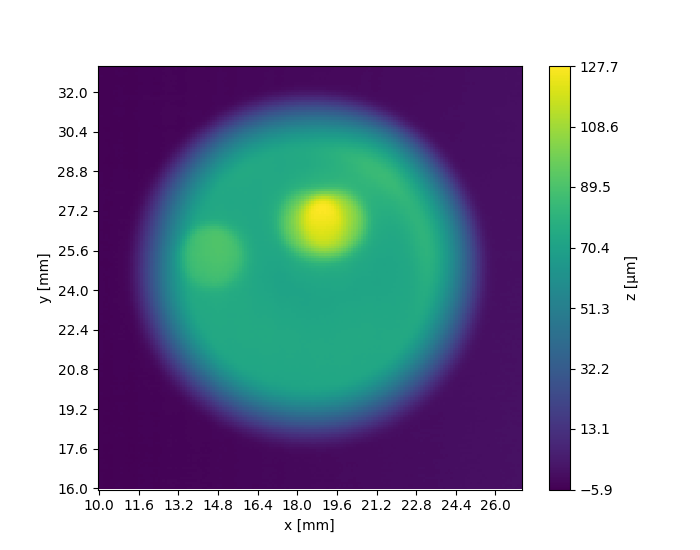

<IPython.core.display.Javascript object>


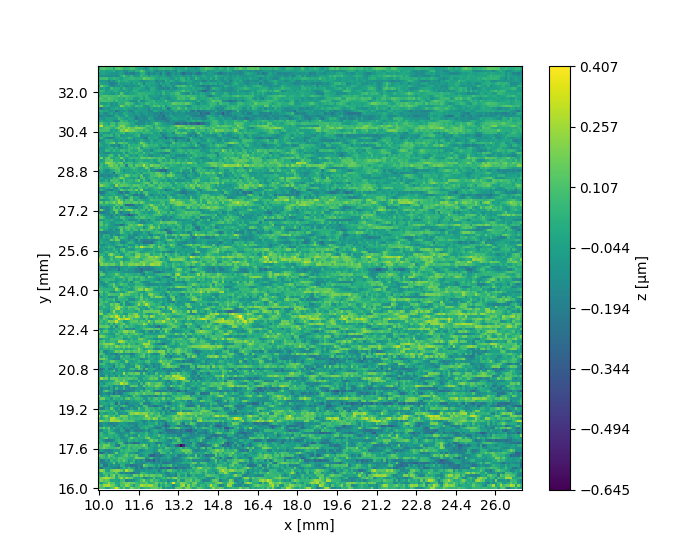

<IPython.core.display.Javascript object>


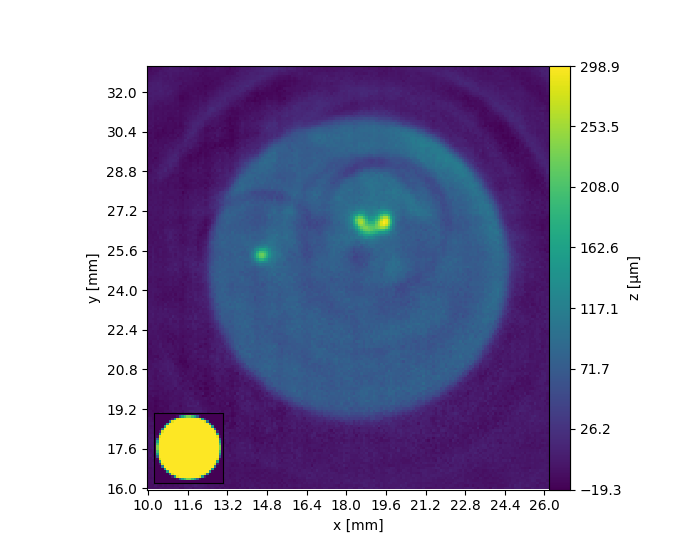

In [4]:
sensor = z[1][0].max() - z[1][0]
background = z[13][0].max() - z[13][0]
background2 = z[12][0].max() - z[12][0]
signal = sensor - background
noise = detrend2D(background - background2)
plot(x, y, signal)
plot(x, y, noise)

diameter = 2.57
sigma = 0.1
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, noise * 0.001, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed, psf=kernel, psf_loc=3)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


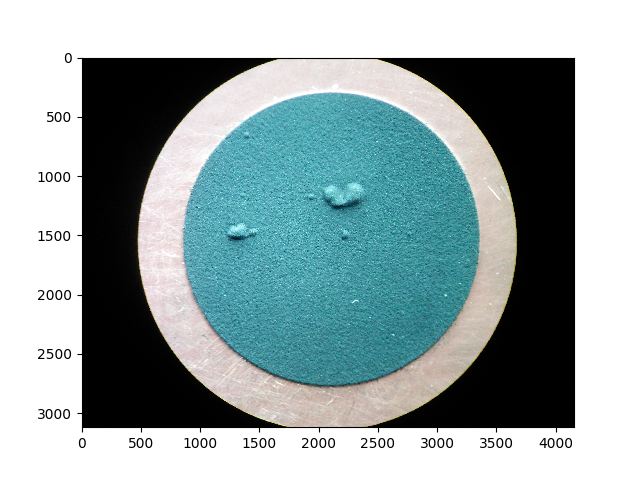

In [5]:
mic = ndi.imread("figures/agglomerat.jpg")
mic = ndi.interpolation.rotate(mic, -90)
plt.figure()
plt.imshow(mic)

<IPython.core.display.Javascript object>


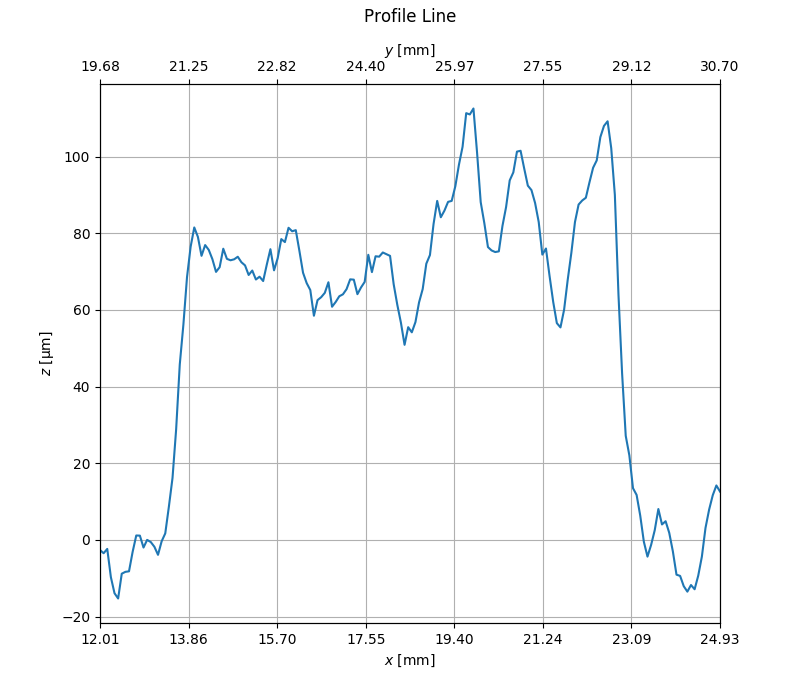

(<matplotlib.figure.Figure at 0x7f302d84bef0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f302dad36d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3031545080>))

In [7]:
plot_profile(x, y, z_reconstructed, *profile.coords)